<a href="https://colab.research.google.com/github/danihga/Jovia/blob/main/CatholicHealth_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
#Import Data

data = pd.read_excel(r'/content/DeidentifiedSDOHPatientData-v1.xlsx')

data.sample(6)

data.columns = ['id', 'age', 'race', 'ethnicity', 'gender',
       'food would run out',
       'Food didn’t last and no money for more',
       'Lack transportation kept from medical appointments or medications?',
       'Lack transportation kept from meetings, work, or things needed for daily living?',
       'Not able to pay the mortgage or rent on time?',
       'Not have a steady place to sleep or slept in a shelter?',
       'Electric, gas, oil, or water company threatened to shut off services?',
       'Fearful of physical/emotional abuse from relative?']

data.sample(6)

,id,age,race,ethnicity,gender,food would run out,Food didn’t last and no money for more,Lack transportation kept from medical appointments or medications?,"Lack transportation kept from meetings, work, or things needed for daily living?",Not able to pay the mortgage or rent on time?,Not have a steady place to sleep or slept in a shelter?,"Electric, gas, oil, or water company threatened to shut off services?",Fearful of physical/emotional abuse from relative?
8466,9466,69,"Asian, Asian Indian",Not Hispanic or Latino,Male,Never True,Never True,No,No,No,No,No,No
3701,4701,63,White or Caucasian,Not Hispanic or Latino,Male,Never True,Never True,No,No,No,No,No,NaN
15713,16713,76,White or Caucasian,Not Hispanic or Latino,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11774,12774,79,White or Caucasian,Not Hispanic or Latino,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,3055,33,White or Caucasian,Not Hispanic or Latino,Female,Never True,Never True,No,No,No,No,No,NaN
2609,3609,60,White or Caucasian,Not Hispanic or Latino,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(15843, 13)

**Proportions of Nulls**

In [ ]:
data.isnull().sum()/15843

id                                                                                  0.000000
age                                                                                 0.000000
race                                                                                0.000000
ethnicity                                                                           0.000000
gender                                                                              0.000000
food would run out                                                                  0.296598
Food didn’t last and no money for more                                              0.297166
Lack transportation kept from medical appointments or medications?                  0.436660
Lack transportation kept from meetings, work, or things needed for daily living?    0.437102
Not able to pay the mortgage or rent on time?                                       0.457552
Not have a steady place to sleep or slept in a shelter?               

**Drop some races?**

In [ ]:
data['race'].value_counts(normalize=True)#.cumsum()

 White or Caucasian              0.718046
 Other                           0.128637
 Black or African American       0.109701
 Other Asian                     0.009847
 Asian Indian                    0.006943
                                   ...   
 Other Asian, Vietnamese         0.000063
 Filipino, White or Caucasian    0.000063
 Samoan, Other Asian             0.000063
 Other, Samoan                   0.000063
 White or Caucasian, Korean      0.000063
Name: race, Length: 65, dtype: float64

**Same for ethnicity?**

In [ ]:
data['ethnicity'].value_counts(normalize=True)#.cumsum()

Not Hispanic or Latino                  0.846872
Hispanic or Latino                      0.136148
Unknown                                 0.015022
Puerto Rican                            0.001199
Patient Refused                         0.000379
Mexican, Mexican American, Chicano/a    0.000252
Cuban                                   0.000126
Name: ethnicity, dtype: float64

**Gender proportions are fine**

In [ ]:
data['gender'].value_counts(normalize=True)#.cumsum()

Female    0.547939
Male      0.452061
Name: gender, dtype: float64

**Proportions of the answers to the questions**

In [ ]:
data['food would run out'].value_counts(normalize=True)#.cumsum()

Never True                  0.913855
Patient declined            0.052046
Patient unable to answer    0.020459
Sometimes True              0.009512
Often True                  0.004128
Name: food would run out, dtype: float64

In [ ]:
data['Food didn’t last and no money for more'].value_counts(normalize=True)#.cumsum()

Never True                  0.914683
Patient declined            0.051998
Patient unable to answer    0.020296
Sometimes True              0.008801
Often True                  0.004221
Name: Food didn’t last and no money for more, dtype: float64

In [ ]:
data['Lack transportation kept from medical appointments or medications?'].value_counts(normalize=True)#.cumsum()

No                          0.889300
Patient declined            0.070140
Patient unable to answer    0.025098
Yes                         0.015462
Name: Lack transportation kept from medical appointments or medications?, dtype: float64

In [ ]:
data['Lack transportation kept from meetings, work, or things needed for daily living?'].value_counts(normalize=True)#.cumsum()

No                          0.891792
Patient declined            0.069298
Patient unable to answer    0.025454
Yes                         0.013456
Name: Lack transportation kept from meetings, work, or things needed for daily living?, dtype: float64

In [ ]:
data['Not able to pay the mortgage or rent on time?'].value_counts(normalize=True)#.cumsum()

No                          0.919479
Patient declined            0.036421
Patient unable to answer    0.026530
Yes                         0.017570
Name: Not able to pay the mortgage or rent on time?, dtype: float64

In [ ]:
data['Not have a steady place to sleep or slept in a shelter?'].value_counts(normalize=True)#.cumsum()

No                          0.925594
Patient declined            0.035864
Patient unable to answer    0.025966
Yes                         0.012576
Name: Not have a steady place to sleep or slept in a shelter?, dtype: float64

In [ ]:
data['Electric, gas, oil, or water company threatened to shut off services?'].value_counts(normalize=True)#.cumsum()

No                          0.893904
Patient declined            0.068710
Patient unable to answer    0.026496
Yes                         0.009094
Already Shut Off            0.001796
Name: Electric, gas, oil, or water company threatened to shut off services?, dtype: float64

In [ ]:
data['Fearful of physical/emotional abuse from relative?'].value_counts(normalize=True)#.cumsum()

No                  0.903800
Patient declined    0.079335
Yes                 0.016865
Name: Fearful of physical/emotional abuse from relative?, dtype: float64

# **Decision Tree Classifier**

In [ ]:
# Only get the first three columns - predictor, and only question column - label
tree_data = data[['age', 'race', 'ethnicity', 'gender',
       'food would run out']]

# Drop NAs
tree_data = tree_data.dropna()

## Keep all the answers

**Data Split**

In [ ]:
X_1 = tree_data.drop(columns = 'food would run out')
y_1 = tree_data['food would run out']

**Label Encoding**


```
{'Patient unable to answer':0, 'Patient declined':1, 'Never True':2, 'Sometimes True':3, 'Often True':4}
```



In [ ]:
mapping = {'Never True':2, 'Patient unable to answer':0, 'Patient declined':1,
       'Sometimes True':3, 'Often True':4}

reverse_mapping = {0:'Patient unable to answer', 1:'Patient declined', 2:'Never True',3:'Sometimes True', 4:'Often True'}

y_1 = y_1.map(mapping)

**One-Hot-Encoding**

In [ ]:
categorical_columns = X_1[['race', 'ethnicity']]

# One-hot encoding for the categorical columns
encoder = OneHotEncoder(sparse_output = False)
categorical_encoded = encoder.fit_transform(categorical_columns)

col_one_hot = list(encoder.get_feature_names_out())
# Convert the one-hot encoded array into a DataFrame with the created column names
one_hot_df = pd.DataFrame(categorical_encoded, columns=col_one_hot)

one_hot_df['age'] = list(X_1['age'])
X_1 = one_hot_df.copy()

**Train - Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.4, random_state = 0)#, stratify=y_1)

In [ ]:
#!pip install --upgrade scikit-learn

0.9162428956027521
0.9091520861372813
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.17      0.04      0.06       217
           2       0.92      0.99      0.95      4090
           3       0.20      0.02      0.04        41
           4       0.00      0.00      0.00        21

    accuracy                           0.91      4458
   macro avg       0.26      0.21      0.21      4458
weighted avg       0.85      0.91      0.88      4458



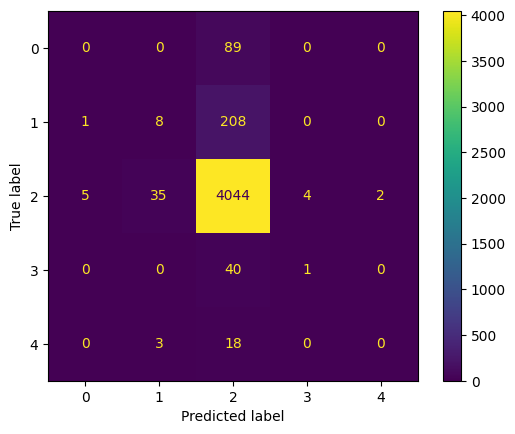

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Fit the pipeline on the training data
dt = DecisionTreeClassifier().fit(X_train, y_train)

# Make predictions on the testing data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
dist= ConfusionMatrixDisplay(cm, display_labels=dt.classes_)
dist.plot()

In [ ]:
pip install graphviz

In [ ]:
pd.Series([0,1,2,4]).map(reverse_mapping)

0    Patient unable to answer
1            Patient declined
2                  Never True
3                  Often True
dtype: object

**Print Decison Tree Figure**

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                feature_names=X_1.columns,
                                class_names=pd.Series([0,1,2,3,4]).map(reverse_mapping),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

## Only True and False Labels

**Data Split**

In [ ]:
X_2 = tree_data.drop(columns = 'food would run out')
y_2 = tree_data['food would run out']

**Label Encoding**


```
{'Patient unable to answer':0, 'Never True':1, 'Patient declined':0,
       'Sometimes True':2, 'Often True':2}
```



In [ ]:
mapping = {'Never True':1, 'Patient unable to answer':0, 'Patient declined':0,
       'Sometimes True':2, 'Often True':2}

reverse_mapping = {0:'No Answer', 1:'Never True', 2: 'True'}

y_2 = y_2.map(mapping)

**One-Hot-Encoding**

In [ ]:
categorical_columns = X_2[['race', 'ethnicity']]

# One-hot encoding for the categorical columns
encoder = OneHotEncoder(sparse_output = False)
categorical_encoded = encoder.fit_transform(categorical_columns)

col_one_hot = list(encoder.get_feature_names_out())
# Convert the one-hot encoded array into a DataFrame with the created column names
one_hot_df = pd.DataFrame(categorical_encoded, columns=col_one_hot)

one_hot_df['age'] = list(X_2['age'])
X_2 = one_hot_df.copy()

**Train - Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Data Split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.4, random_state = 0)#, stratify=y_1)

In [ ]:
#!pip install --upgrade scikit-learn

**Fit the Decision Tree and Print Metrics**

0.9165420281184565
0.9087034544638851
              precision    recall  f1-score   support

           0       0.16      0.03      0.05       306
           1       0.92      0.99      0.95      4090
           2       0.17      0.02      0.03        62

    accuracy                           0.91      4458
   macro avg       0.42      0.34      0.34      4458
weighted avg       0.86      0.91      0.88      4458



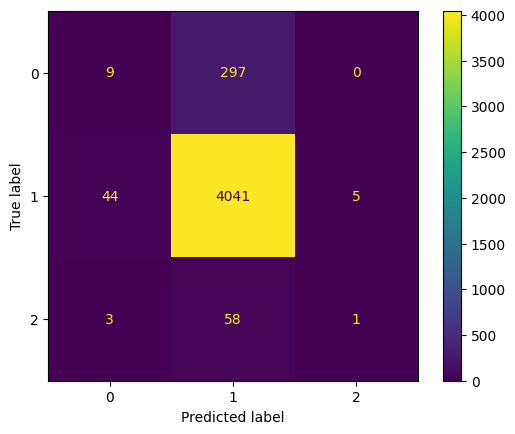

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Fit the pipeline on the training data
dt2 = DecisionTreeClassifier().fit(X_train_2, y_train_2)

# Make predictions on the testing data
y_train_2_pred = dt2.predict(X_train_2)
y_test_2_pred = dt2.predict(X_test_2)

print(accuracy_score(y_train_2, y_train_2_pred))
print(accuracy_score(y_test_2, y_test_2_pred))
print(classification_report(y_test_2, y_test_2_pred))
cm = confusion_matrix(y_test_2, y_test_2_pred)
dist= ConfusionMatrixDisplay(cm, display_labels=dt2.classes_)
dist.plot()

**Print Decison Tree Figure**

In [ ]:
dot_data = tree.export_graphviz(dt2, out_file=None,
                                feature_names=X_2.columns,
                                class_names=pd.Series([0,1,2]).map(reverse_mapping),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_true_false_noanswer")

'decision_tree_true_false_noanswer.png'

# Dealing with unbalanced classes

In [ ]:
from sklearn import svm
model = svm.SVC(gamma='scale',
            class_weight='balanced',
                probability=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))


0.018393898609241812


**Gradient Boost**

In [ ]:
condition = (tree_data['food would run out'] == 'Patient unable to answer') | (tree_data['food would run out'] == 'Patient declined')

sample_data = tree_data[~condition]

X_sample = sample_data.drop(columns = ['food would run out'])
y_sample = sample_data['food would run out']

mapping = {'Never True':0,
       'Sometimes True':1, 'Often True':1}

y_sample = y_sample.map(mapping)


In [ ]:
categorical_columns = X_sample[['race', 'ethnicity']]

# One-hot encoding for the categorical columns
encoder = OneHotEncoder(sparse_output = False)
categorical_encoded = encoder.fit_transform(categorical_columns)

col_one_hot = list(encoder.get_feature_names_out())
# Convert the one-hot encoded array into a DataFrame with the created column names
one_hot_df = pd.DataFrame(categorical_encoded, columns=col_one_hot)

one_hot_df['age'] = list(X_sample['age'])
X_sample = one_hot_df.copy()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.4, random_state = 0)#, stratify=y_sample)

0.9857315598548972
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4076
           1       0.00      0.00      0.00        59

    accuracy                           0.99      4135
   macro avg       0.49      0.50      0.50      4135
weighted avg       0.97      0.99      0.98      4135



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


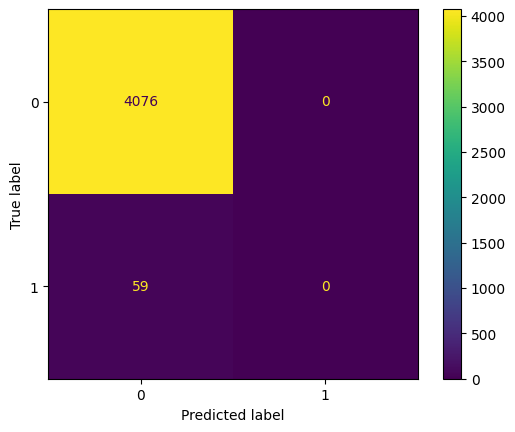

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth = 1,
                            n_estimators = 100,
                              scale_pos_weight=3)
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
dist= ConfusionMatrixDisplay(cm, display_labels=xgb_model.classes_)
dist.plot()


**Smote**

In [ ]:
X_smt = tree_data.drop(columns = 'food would run out')
y_smt = tree_data['food would run out']

In [ ]:
mapping = {'Never True':2, 'Patient unable to answer':0, 'Patient declined':1,
       'Sometimes True':3, 'Often True':4}

reverse_mapping = {0:'Patient unable to answer', 1:'Patient declined', 2:'Never True',3:'Sometimes True', 4:'Often True'}

y_smt = y_smt.map(mapping)

In [ ]:
y_smt.value_counts(normalize=True)

2    0.913855
1    0.052046
0    0.020459
3    0.009512
4    0.004128
Name: food would run out, dtype: float64

In [ ]:
categorical_columns = X_smt[['race', 'ethnicity']]

# One-hot encoding for the categorical columns
encoder = OneHotEncoder(sparse_output = False)
categorical_encoded = encoder.fit_transform(categorical_columns)

col_one_hot = list(encoder.get_feature_names_out())
# Convert the one-hot encoded array into a DataFrame with the created column names
one_hot_df = pd.DataFrame(categorical_encoded, columns=col_one_hot)

one_hot_df['age'] = list(X_smt['age'])
X_smt = one_hot_df.copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size = 0.4, random_state = 0, stratify=y_smt)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smt_train, y_smt_train = oversample.fit_resample(X_train, y_train)

0.7260556464811784
0.4230596680125617
              precision    recall  f1-score   support

           0       0.03      0.37      0.05        91
           1       0.05      0.16      0.07       232
           2       0.91      0.44      0.60      4074
           3       0.04      0.14      0.06        43
           4       0.01      0.22      0.03        18

    accuracy                           0.42      4458
   macro avg       0.21      0.27      0.16      4458
weighted avg       0.84      0.42      0.55      4458



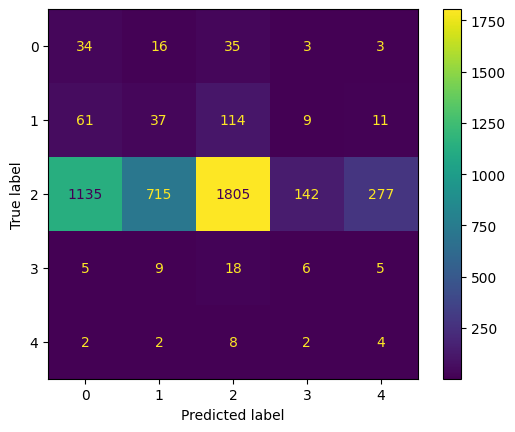

In [ ]:
# Fit the pipeline on the training data
dtsmt = DecisionTreeClassifier().fit(X_smt_train, y_smt_train)

# Make predictions on the testing data
y_train_smt_pred = dtsmt.predict(X_smt_train)
y_test_smt_pred = dtsmt.predict(X_test)

print(accuracy_score(y_smt_train, y_train_smt_pred))
print(accuracy_score(y_test, y_test_smt_pred))
print(classification_report(y_test, y_test_smt_pred))
cm = confusion_matrix(y_test, y_test_smt_pred)
dist= ConfusionMatrixDisplay(cm, display_labels=dtsmt.classes_)
dist.plot()

**Decision Trees**

In [ ]:
X_dt = tree_data.drop(columns = 'food would run out')
y_dt = tree_data['food would run out']

In [ ]:
mapping = {'Never True':2, 'Patient unable to answer':0, 'Patient declined':1,
       'Sometimes True':3, 'Often True':4}

reverse_mapping = {0:'Patient unable to answer', 1:'Patient declined', 2:'Never True',3:'Sometimes True', 4:'Often True'}

y_dt = y_dt.map(mapping)

In [ ]:
y_dt.value_counts(normalize=True)

2    0.913855
1    0.052046
0    0.020459
3    0.009512
4    0.004128
Name: food would run out, dtype: float64

In [ ]:
categorical_columns = X_dt[['race', 'ethnicity']]

# One-hot encoding for the categorical columns
encoder = OneHotEncoder(sparse_output = False)
categorical_encoded = encoder.fit_transform(categorical_columns)

col_one_hot = list(encoder.get_feature_names_out())
# Convert the one-hot encoded array into a DataFrame with the created column names
one_hot_df = pd.DataFrame(categorical_encoded, columns=col_one_hot)

one_hot_df['age'] = list(X_dt['age'])
X_dt = one_hot_df.copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size = 0.4, random_state = 0, stratify=y_smt)

In [ ]:
1/y_dt.value_counts(normalize=True)/sum(1/y_dt.value_counts(normalize=True))

2    0.002627
1    0.046123
0    0.117330
3    0.252371
4    0.581550
Name: food would run out, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.43      0.05        91
           1       0.04      0.15      0.06       232
           2       0.91      0.30      0.46      4074
           3       0.01      0.12      0.02        43
           4       0.01      0.28      0.02        18

    accuracy                           0.30      4458
   macro avg       0.20      0.25      0.12      4458
weighted avg       0.83      0.30      0.42      4458

Confusion Matrix:


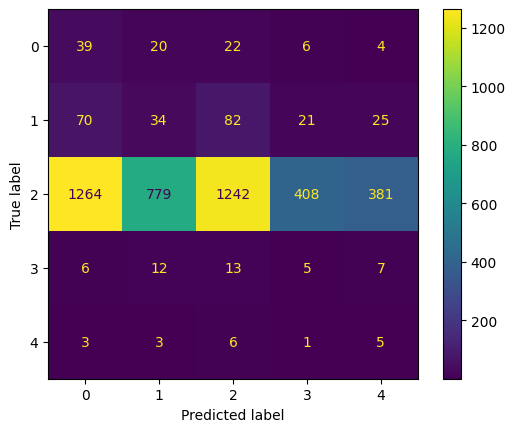

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the class weights based on the imbalance in your dataset


class_weights = {0: 0.117330, 1: 0.046123, 2: 0.002627, 3: 0.252371, 4: 0.581550}

# Create a Decision Tree Classifier with class weighting
dt_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model using classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
dist= ConfusionMatrixDisplay(cm, display_labels=dtsmt.classes_)
dist.plot()